<a href="https://colab.research.google.com/github/xiaochengJF/MachineLearning/blob/master/Naive_Bayes%E6%9C%B4%E7%B4%A0%E8%B4%9D%E5%8F%B6%E6%96%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes

In [4]:
# -*- coding: UTF-8 -*-
import numpy as np
from functools import reduce

"""
函数说明:创建实验样本
Parameters:
	无
Returns:
	postingList - 实验样本切分的词条
	classVec - 类别标签向量
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-08-11
"""
def loadDataSet():
    # 切分的词条
	postingList=[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'], 
				['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
				['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
				['stop', 'posting', 'stupid', 'worthless', 'garbage'],
				['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
				['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]
	classVec = [0,1,0,1,0,1]  # 类别标签向量，1代表侮辱性词汇，0代表不是
	return postingList,classVec	# 返回实验样本切分的词条和类别标签向量

"""
函数说明:将切分的实验样本词条整理成不重复的词条列表，也就是词汇表
Parameters:
	dataSet - 整理的样本数据集
Returns:
	vocabSet - 返回不重复的词条列表，也就是词汇表
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-08-11
"""
def createVocabList(dataSet):
    # 创建一个空的不重复列表
	vocabSet = set([])  
	for document in dataSet:				
		vocabSet = vocabSet | set(document) # 取并集
	return list(vocabSet)

"""
函数说明:根据vocabList词汇表，将inputSet向量化，向量的每个元素为1或0
Parameters:
	vocabList - createVocabList返回的列表
	inputSet - 切分的词条列表
Returns:
	returnVec - 文档向量,词集模型
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-08-11
"""
def setOfWords2Vec(vocabList, inputSet):
	returnVec = [0] * len(vocabList) # 创建一个其中所含元素都为0的向量
	for word in inputSet:		# 遍历每个词条
		if word in vocabList:	# 如果词条存在于词汇表中，则置1
			returnVec[vocabList.index(word)] = 1
		else: print("the word: %s is not in my Vocabulary!" % word)
	return returnVec	# 返回文档向量


"""
函数说明:朴素贝叶斯分类器训练函数
Parameters:
	trainMatrix - 训练文档矩阵，即setOfWords2Vec返回的returnVec构成的矩阵
	trainCategory - 训练类别标签向量，即loadDataSet返回的classVec
Returns:
	p0Vect - 非的条件概率数组
	p1Vect - 侮辱类的条件概率数组
	pAbusive - 文档属于侮辱类的概率
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-08-12
"""
def trainNB0(trainMatrix, trainCategory):
	numTrainDocs = len(trainMatrix)	 # 计算训练的文档数目
	numWords = len(trainMatrix[0])   # 计算每篇文档的词条数
	pAbusive = sum(trainCategory)/float(numTrainDocs)	# 文档属于侮辱类的概率
	p0Num = np.zeros(numWords); p1Num = np.zeros(numWords)	# 创建numpy.zeros数组,
	p0Denom = 0.0; p1Denom = 0.0   # 分母初始化为0.0
	for i in range(numTrainDocs):
		if trainCategory[i] == 1:	# 统计属于侮辱类的条件概率所需的数据，即P(w0|1),P(w1|1),P(w2|1)···
			p1Num += trainMatrix[i]
			p1Denom += sum(trainMatrix[i]) # 该词条的总的词数目   这样求得每个词条出现的概率 P(w1),P(w2), P(w3)...
		else:				   # 统计属于非侮辱类的条件概率所需的数据，即P(w0|0),P(w1|0),P(w2|0)···
			p0Num += trainMatrix[i]
			p0Denom += sum(trainMatrix[i])
	p1Vect = p1Num/p1Denom	# 相除        
	p0Vect = p0Num/p0Denom          
	return p0Vect, p1Vect, pAbusive	 # 返回属于侮辱类的条件概率数组，属于非侮辱类的条件概率数组，文档属于侮辱类的概率

"""
函数说明:朴素贝叶斯分类器分类函数
Parameters:
	vec2Classify - 待分类的词条数组
	p0Vec - 非侮辱类的条件概率数组
	p1Vec -侮辱类的条件概率数组
	pClass1 - 文档属于侮辱类的概率
Returns:
	0 - 属于非侮辱类
	1 - 属于侮辱类
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-08-12
"""
def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1):
	p1 = reduce(lambda x,y:x*y, vec2Classify * p1Vec) * pClass1  # 对应元素相乘 
	p0 = reduce(lambda x,y:x*y, vec2Classify * p0Vec) * (1.0 - pClass1)
	print('p0:',p0)
	print('p1:',p1)
	if p1 > p0:
		return 1
	else: 
		return 0

"""
函数说明:测试朴素贝叶斯分类器
Parameters:
	无
Returns:
	无
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-08-12
"""
def testingNB():
	listOPosts, listClasses = loadDataSet()	# 创建实验样本
	myVocabList = createVocabList(listOPosts) # 创建词汇表
	trainMat=[]
	for postinDoc in listOPosts:
		trainMat.append(setOfWords2Vec(myVocabList, postinDoc))	# 将实验样本向量化
	p0V,p1V,pAb = trainNB0(np.array(trainMat),np.array(listClasses)) # 训练朴素贝叶斯分类器
	testEntry = ['love', 'my', 'dalmation']	# 测试样本1
	thisDoc = np.array(setOfWords2Vec(myVocabList, testEntry))	# 测试样本向量化
	if classifyNB(thisDoc,p0V,p1V,pAb):
		print(testEntry,'属于侮辱类') # 执行分类并打印分类结果
	else:
		print(testEntry,'属于非侮辱类')	# 执行分类并打印分类结果
	testEntry = ['stupid', 'garbage'] # 测试样本2

	thisDoc = np.array(setOfWords2Vec(myVocabList, testEntry))	# 测试样本向量化
	if classifyNB(thisDoc,p0V,p1V,pAb):
		print(testEntry,'属于侮辱类')	# 执行分类并打印分类结果
	else:
		print(testEntry,'属于非侮辱类')	# 执行分类并打印分类结果

if __name__ == '__main__':
	testingNB()

p0: 0.0
p1: 0.0
['love', 'my', 'dalmation'] 属于非侮辱类
p0: 0.0
p1: 0.0
['stupid', 'garbage'] 属于非侮辱类


## 改进
上面的预测明显不科学，算出来都等于0，预测都相同，因此需要改进   
- 拉普拉斯平滑(Laplace Smoothing)又被称为加1平滑：将所有词的出现数初始化为1，并将分母初始化为2(类别数目，例如：一个硬币一次都没有抛对其进行估计，首先认为硬币是均匀的，即$P=\frac12$)，是为了解决0概率问题  
- 用取对数的方法解决很小的数相乘造成的下溢出问题

<font face=楷体 color=green size=5>绿色链接</font>  
【1】[贝叶斯统计观点下的拉普拉斯平滑](https://zhuanlan.zhihu.com/p/24291822)  
【2】[伯努利分布、二项分布和Beta分布，从贝叶斯观点出发](https://blog.csdn.net/weixin_41400276/article/details/85288216)

In [25]:
def trainNB0(trainMatrix,trainCategory):
    numTrainDocs = len(trainMatrix)  # 计算训练的文档数目
    numWords = len(trainMatrix[0])  # 计算每篇文档的词条数
    pAbusive = sum(trainCategory)/float(numTrainDocs)  # 文档属于侮辱类的概率
    p0Num = np.ones(numWords); p1Num = np.ones(numWords)  # 创建numpy.ones数组,词条出现数初始化为1，拉普拉斯平滑
    p0Denom = 2.0; p1Denom = 2.0   # 分母初始化为2,拉普拉斯平滑
    for i in range(numTrainDocs):
        if trainCategory[i] == 1:  # 统计属于侮辱类的条件概率所需的数据，即P(w0|1),P(w1|1),P(w2|1)···
            p1Num += trainMatrix[i]
            p1Denom += sum(trainMatrix[i])
        else:                  # 统计属于非侮辱类的条件概率所需的数据，即P(w0|0),P(w1|0),P(w2|0)···
            p0Num += trainMatrix[i]
            p0Denom += sum(trainMatrix[i])
    p1Vect = np.log(p1Num/p1Denom)   # 取对数，防止下溢出         
    p0Vect = np.log(p0Num/p0Denom)         
    return p0Vect, p1Vect, pAbusive   # 返回属于侮辱类的条件概率数组，属于非侮辱类的条件概率数组，文档属于侮辱类的概率

def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1):
    p1 = sum(vec2Classify * p1Vec) + np.log(pClass1)        #对应元素相乘。logA * B = logA + logB，所以这里加上log(pClass1)
    p0 = sum(vec2Classify * p0Vec) + np.log(1.0 - pClass1)
    if p1 > p0:
        return 1
    else:
        return 0

if __name__ == '__main__':
	testingNB()

['love', 'my', 'dalmation'] 属于非侮辱类
['stupid', 'garbage'] 属于侮辱类


## 垃圾邮件分类

In [6]:
!unzip email.zip

Archive:  email.zip
   creating: email/
   creating: email/spam/
 extracting: email/spam/10.txt       
 extracting: email/spam/1.txt        
 extracting: email/spam/11.txt       
 extracting: email/spam/12.txt       
 extracting: email/spam/13.txt       
 extracting: email/spam/14.txt       
 extracting: email/spam/2.txt        
 extracting: email/spam/16.txt       
 extracting: email/spam/15.txt       
 extracting: email/spam/17.txt       
 extracting: email/spam/18.txt       
 extracting: email/spam/19.txt       
 extracting: email/spam/20.txt       
 extracting: email/spam/25.txt       
 extracting: email/spam/21.txt       
 extracting: email/spam/22.txt       
 extracting: email/spam/23.txt       
   creating: email/ham/
 extracting: email/ham/19.txt        
 extracting: email/spam/24.txt       
 extracting: email/spam/6.txt        
 extracting: email/spam/3.txt        
 extracting: email/spam/4.txt        
 extracting: email/spam/5.txt        
 extracting: email/spam/7.txt        

In [23]:
# -*- coding: UTF-8 -*-
import numpy as np
import random
import re

"""
函数说明:将切分的实验样本词条整理成不重复的词条列表，也就是词汇表

Parameters:
    dataSet - 整理的样本数据集
Returns:
    vocabSet - 返回不重复的词条列表，也就是词汇表
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Modify:
    2017-08-11
"""
def createVocabList(dataSet):
    vocabSet = set([])      # 创建一个空的不重复列表
    for document in dataSet:               
        vocabSet = vocabSet | set(document) # 取并集
    return list(vocabSet)

"""
函数说明:根据vocabList词汇表，将inputSet向量化，向量的每个元素为1或0

Parameters:
    vocabList - createVocabList返回的列表
    inputSet - 切分的词条列表
Returns:
    returnVec - 文档向量,词集模型
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Modify:
    2017-08-11
"""
def setOfWords2Vec(vocabList, inputSet):
    returnVec = [0] * len(vocabList)   # 创建一个其中所含元素都为0的向量
    for word in inputSet:         # 遍历每个词条
        if word in vocabList:     # 如果词条存在于词汇表中，则置1
            returnVec[vocabList.index(word)] = 1
        else: print("the word: %s is not in my Vocabulary!" % word)
    return returnVec            # 返回文档向量


"""
函数说明:根据vocabList词汇表，构建词袋模型

Parameters:
    vocabList - createVocabList返回的列表
    inputSet - 切分的词条列表
Returns:
    returnVec - 文档向量,词袋模型
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Modify:
    2017-08-14
"""
def bagOfWords2VecMN(vocabList, inputSet):
    returnVec = [0]*len(vocabList)   # 创建一个其中所含元素都为0的向量
    for word in inputSet:       # 遍历每个词条
        if word in vocabList:   # 如果词条存在于词汇表中，则计数加一
            returnVec[vocabList.index(word)] += 1
    return returnVec          # 返回词袋模型

"""
函数说明:朴素贝叶斯分类器训练函数

Parameters:
    trainMatrix - 训练文档矩阵，即setOfWords2Vec返回的returnVec构成的矩阵
    trainCategory - 训练类别标签向量，即loadDataSet返回的classVec
Returns:
    p0Vect - 侮辱类的条件概率数组
    p1Vect - 非侮辱类的条件概率数组
    pAbusive - 文档属于侮辱类的概率
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Modify:
    2017-08-12
"""
def trainNB0(trainMatrix,trainCategory):
    numTrainDocs = len(trainMatrix)  # 计算训练的文档数目
    numWords = len(trainMatrix[0])   # 计算每篇文档的词条数
    pAbusive = sum(trainCategory)/float(numTrainDocs)   # 文档属于侮辱类的概率
    p0Num = np.ones(numWords); p1Num = np.ones(numWords)   # 创建numpy.ones数组,词条出现数初始化为1，拉普拉斯平滑
    p0Denom = 2.0; p1Denom = 2.0   # 分母初始化为2,拉普拉斯平滑
    for i in range(numTrainDocs):
        if trainCategory[i] == 1:   # 统计属于侮辱类的条件概率所需的数据，即P(w0|1),P(w1|1),P(w2|1)···
            p1Num += trainMatrix[i]
            p1Denom += sum(trainMatrix[i])
        else:                   # 统计属于非侮辱类的条件概率所需的数据，即P(w0|0),P(w1|0),P(w2|0)···
            p0Num += trainMatrix[i]
            p0Denom += sum(trainMatrix[i])
    p1Vect = np.log(p1Num/p1Denom)    # 取对数，防止下溢出         
    p0Vect = np.log(p0Num/p0Denom)         
    return p0Vect,p1Vect,pAbusive     # 返回属于侮辱类的条件概率数组，属于非侮辱类的条件概率数组，文档属于侮辱类的概率

"""
函数说明:朴素贝叶斯分类器分类函数

Parameters:
    vec2Classify - 待分类的词条数组
    p0Vec - 侮辱类的条件概率数组
    p1Vec -非侮辱类的条件概率数组
    pClass1 - 文档属于侮辱类的概率
Returns:
    0 - 属于非侮辱类
    1 - 属于侮辱类
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Modify:
    2017-08-12
"""
def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1):
    p1 = sum(vec2Classify * p1Vec) + np.log(pClass1)        #对应元素相乘。logA * B = logA + logB，所以这里加上log(pClass1)
    p0 = sum(vec2Classify * p0Vec) + np.log(1.0 - pClass1)
    if p1 > p0:
        return 1
    else:
        return 0

"""
函数说明:朴素贝叶斯分类器训练函数

Parameters:
    trainMatrix - 训练文档矩阵，即setOfWords2Vec返回的returnVec构成的矩阵
    trainCategory - 训练类别标签向量，即loadDataSet返回的classVec
Returns:
    p0Vect - 侮辱类的条件概率数组
    p1Vect - 非侮辱类的条件概率数组
    pAbusive - 文档属于侮辱类的概率
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Modify:
    2017-08-12
"""
def trainNB0(trainMatrix, trainCategory):
    numTrainDocs = len(trainMatrix)  # 计算训练的文档数目
    numWords = len(trainMatrix[0])   # 计算每篇文档的词条数
    pAbusive = sum(trainCategory)/float(numTrainDocs)  # 文档属于侮辱类的概率
    p0Num = np.ones(numWords); p1Num = np.ones(numWords)  # 创建numpy.ones数组,词条出现数初始化为1，拉普拉斯平滑
    p0Denom = 2.0; p1Denom = 2.0   # 分母初始化为2,拉普拉斯平滑
    for i in range(numTrainDocs):
        if trainCategory[i] == 1:   # 统计属于侮辱类的条件概率所需的数据，即P(w0|1),P(w1|1),P(w2|1)···
            p1Num += trainMatrix[i]
            p1Denom += sum(trainMatrix[i])
        else:                   # 统计属于非侮辱类的条件概率所需的数据，即P(w0|0),P(w1|0),P(w2|0)···
            p0Num += trainMatrix[i]
            p0Denom += sum(trainMatrix[i])
    p1Vect = np.log(p1Num/p1Denom)    # 取对数，防止下溢出         
    p0Vect = np.log(p0Num/p0Denom)         
    return p0Vect, p1Vect, pAbusive    # 返回属于侮辱类的条件概率数组，属于非侮辱类的条件概率数组，文档属于侮辱类的概率


"""
函数说明:接收一个大字符串并将其解析为字符串列表

Parameters:
    无
Returns:
    无
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Modify:
    2017-08-14
"""
def textParse(bigString):   # 将字符串转换为字符列表
    listOfTokens = re.split(r'\W*', bigString)   # 将特殊符号作为切分标志进行字符串切分，即非字母、非数字
    a = [tok.lower() for tok in listOfTokens if len(tok) > 2]
    return [tok.lower() for tok in listOfTokens if len(tok) > 2]  # 除了单个字母，例如大写的I，其它单词变成小写

"""
函数说明:测试朴素贝叶斯分类器

Parameters:
    无
Returns:
    无
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Modify:
    2017-08-14
"""
def spamTest():
    docList = []; classList = []; fullText = []
    for i in range(1, 26):   # 遍历25个txt文件
        #wordList = textParse(open('email/spam/%d.txt' % i, 'r').read())  # 读取每个垃圾邮件，并字符串转换成字符串列表
        #wordList = textParse(open('email/spam/%d.txt' % i, encoding='utf-8',errors='ignore').read())
        wordList = textParse(open('email/spam/%d.txt' % i, encoding='ISO-8859-1').read())
        docList.append(wordList)
        fullText.append(wordList)
        classList.append(1)  # 标记垃圾邮件，1表示垃圾文件
        #wordList = textParse(open('email/ham/%d.txt' % i, 'r').read())  # 读取每个非垃圾邮件，并字符串转换成字符串列表
        #wordList = textParse(open('email/ham/%d.txt' % i, encoding='utf-8',errors='ignore').read())
        wordList = textParse(open('email/ham/%d.txt' % i, encoding='ISO-8859-1').read())
        docList.append(wordList)
        fullText.append(wordList)
        classList.append(0)   # 标记非垃圾邮件，1表示垃圾文件   
    vocabList = createVocabList(docList)   # 创建词汇表，不重复
    trainingSet = list(range(50)); testSet = []  # 创建存储训练集的索引值的列表和测试集的索引值的列表                       
    for i in range(10):    # 从50个邮件中，随机挑选出40个作为训练集,10个做测试集
        randIndex = int(random.uniform(0, len(trainingSet)))   # 随机选取索索引值
        testSet.append(trainingSet[randIndex])    # 添加测试集的索引值
        del(trainingSet[randIndex])   # 在训练集列表中删除添加到测试集的索引值
    trainMat = []; trainClasses = []  # 创建训练集矩阵和训练集类别标签系向量             
    for docIndex in trainingSet:     # 遍历训练集
        trainMat.append(setOfWords2Vec(vocabList, docList[docIndex]))  # 将生成的词集模型添加到训练矩阵中
        trainClasses.append(classList[docIndex])   # 将类别添加到训练集类别标签系向量中
    p0V, p1V, pSpam = trainNB0(np.array(trainMat), np.array(trainClasses))  # 训练朴素贝叶斯模型
    errorCount = 0     # 错误分类计数
    for docIndex in testSet:   # 遍历测试集
        wordVector = setOfWords2Vec(vocabList, docList[docIndex])  # 测试集的词集模型
        if classifyNB(np.array(wordVector), p0V, p1V, pSpam) != classList[docIndex]:  # 如果分类错误
            errorCount += 1    # 错误计数加1
            print("分类错误的测试集：",docList[docIndex])
    print('错误率：%.2f%%' % (float(errorCount) / len(testSet) * 100))


if __name__ == '__main__':
    spamTest()

分类错误的测试集： ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
错误率：10.00%


/usr/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


## 新闻分类 
#### 数据集  
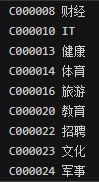

In [24]:
!unzip Sample.zip

Archive:  Sample.zip
   creating: Sample/
   creating: Sample/C000024/
 extracting: Sample/C000024/13.txt   
 extracting: Sample/C000024/12.txt   
 extracting: Sample/C000024/10.txt   
 extracting: Sample/C000024/11.txt   
 extracting: Sample/C000024/14.txt   
   creating: Sample/C000023/
 extracting: Sample/C000023/11.txt   
 extracting: Sample/C000024/18.txt   
 extracting: Sample/C000024/15.txt   
 extracting: Sample/C000024/16.txt   
 extracting: Sample/C000024/17.txt   
 extracting: Sample/C000023/15.txt   
 extracting: Sample/C000024/19.txt   
 extracting: Sample/C000023/10.txt   
 extracting: Sample/C000023/12.txt   
   creating: Sample/C000022/
 extracting: Sample/C000022/13.txt   
 extracting: Sample/C000023/13.txt   
 extracting: Sample/C000023/14.txt   
 extracting: Sample/C000023/16.txt   
 extracting: Sample/C000023/17.txt   
 extracting: Sample/C000023/18.txt   
 extracting: Sample/C000023/19.txt   
 extracting: Sample/C000022/10.txt   
 extracting: Sample/C000022/11.txt 

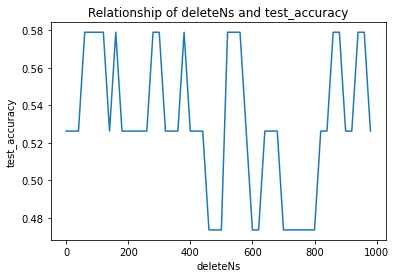

In [36]:
# -*- coding: UTF-8 -*-
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import os
import random
import jieba

"""
函数说明:中文文本处理

Parameters:
    folder_path - 文本存放的路径
    test_size - 测试集占比，默认占所有数据集的百分之20
Returns:
    all_words_list - 按词频降序排序的训练集列表
    train_data_list - 训练集列表
    test_data_list - 测试集列表
    train_class_list - 训练集标签列表
    test_class_list - 测试集标签列表
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Modify:
    2017-08-22
"""
def TextProcessing(folder_path, test_size = 0.2):
    folder_list = os.listdir(folder_path)  # 查看folder_path下的文件
    data_list = []    # 数据集数据
    class_list = []    # 数据集类别

    #遍历每个子文件夹
    for folder in folder_list:
        new_folder_path = os.path.join(folder_path, folder)  # 根据子文件夹，生成新的路径
        files = os.listdir(new_folder_path)  # 存放子文件夹下的txt文件的列表

        j = 1
        # 遍历每个txt文件
        for file in files:
            if j > 100:  # 每类txt样本数最多100个
                break
            with open(os.path.join(new_folder_path, file), 'r', encoding = 'utf-8') as f:    # 打开txt文件
                raw = f.read()

            word_cut = jieba.cut(raw, cut_all = False)   # 精简模式，返回一个可迭代的generator
            word_list = list(word_cut)    # generator转换为list

            data_list.append(word_list)  # 添加数据集数据
            class_list.append(folder)   # 添加数据集类别
            j += 1

    data_class_list = list(zip(data_list, class_list))   # zip压缩合并，将数据与标签对应压缩
    random.shuffle(data_class_list)              # 将data_class_list乱序
    index = int(len(data_class_list) * test_size) + 1  # 训练集和测试集切分的索引值
    train_list = data_class_list[index:]           # 训练集
    test_list = data_class_list[:index]           # 测试集
    train_data_list, train_class_list = zip(*train_list)  # 训练集解压缩
    test_data_list, test_class_list = zip(*test_list)    # 测试集解压缩

    all_words_dict = {}                   # 统计训练集词频
    for word_list in train_data_list:
        for word in word_list:
            if word in all_words_dict.keys():
                all_words_dict[word] += 1
            else:
                all_words_dict[word] = 1

    #根据键的值倒序排序
    all_words_tuple_list = sorted(all_words_dict.items(), key = lambda f:f[1], reverse = True)
    all_words_list, all_words_nums = zip(*all_words_tuple_list)    # 解压缩
    all_words_list = list(all_words_list)                # 转换成列表
    return all_words_list, train_data_list, test_data_list, train_class_list, test_class_list

"""
函数说明:读取文件里的内容，并去重

Parameters:
    words_file - 文件路径
Returns:
    words_set - 读取的内容的set集合
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Modify:
    2017-08-22
"""
def MakeWordsSet(words_file):
    words_set = set()    # 创建set集合
    with open(words_file, 'r', encoding = 'utf-8') as f:  # 打开文件
        for line in f.readlines():   # 一行一行读取
            word = line.strip()   # 去回车
            if len(word) > 0:    # 有文本，则添加到words_set中
                words_set.add(word)                               
    return words_set             # 返回处理结果

"""
函数说明:根据feature_words将文本向量化

Parameters:
    train_data_list - 训练集
    test_data_list - 测试集
    feature_words - 特征集
Returns:
    train_feature_list - 训练集向量化列表
    test_feature_list - 测试集向量化列表
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Modify:
    2017-08-22
"""
def TextFeatures(train_data_list, test_data_list, feature_words):
    def text_features(text, feature_words):    # 出现在特征集中，则置1                                               
        text_words = set(text)
        features = [1 if word in text_words else 0 for word in feature_words]
        return features
    train_feature_list = [text_features(text, feature_words) for text in train_data_list]
    test_feature_list = [text_features(text, feature_words) for text in test_data_list]
    return train_feature_list, test_feature_list   # 返回结果


"""
函数说明:文本特征选取

Parameters:
    all_words_list - 训练集所有文本列表
    deleteN - 删除词频最高的deleteN个词
    stopwords_set - 指定的结束语
Returns:
    feature_words - 特征集
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Modify:
    2017-08-22
"""
def words_dict(all_words_list, deleteN, stopwords_set = set()):
    feature_words = []      # 特征列表
    n = 1
    for t in range(deleteN, len(all_words_list), 1):
        if n > 1000:    # feature_words的维度为1000
            break                               
        #如果这个词不是数字，并且不是指定的结束语，并且单词长度大于1小于5，那么这个词就可以作为特征词
        if not all_words_list[t].isdigit() and all_words_list[t] not in stopwords_set and 1 < len(all_words_list[t]) < 5:
            feature_words.append(all_words_list[t])
        n += 1
    return feature_words

"""
函数说明:新闻分类器

Parameters:
    train_feature_list - 训练集向量化的特征文本
    test_feature_list - 测试集向量化的特征文本
    train_class_list - 训练集分类标签
    test_class_list - 测试集分类标签
Returns:
    test_accuracy - 分类器精度
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Modify:
    2017-08-22
"""
def TextClassifier(train_feature_list, test_feature_list, train_class_list, test_class_list):
    classifier = MultinomialNB().fit(train_feature_list, train_class_list)
    test_accuracy = classifier.score(test_feature_list, test_class_list)
    return test_accuracy

if __name__ == '__main__':
    #文本预处理
    folder_path = './Sample'  # 训练集存放地址
    all_words_list, train_data_list, test_data_list, train_class_list, test_class_list = TextProcessing(folder_path, test_size=0.2)

    # 生成stopwords_set
    stopwords_file = 'stopwords_cn'
    stopwords_set = MakeWordsSet(stopwords_file)


    test_accuracy_list = []
    deleteNs = range(0, 1000, 20)  # 0 20 40 60 ... 980
    for deleteN in deleteNs:
        feature_words = words_dict(all_words_list, deleteN, stopwords_set)
        train_feature_list, test_feature_list = TextFeatures(train_data_list, test_data_list, feature_words)
        test_accuracy = TextClassifier(train_feature_list, test_feature_list, train_class_list, test_class_list)
        test_accuracy_list.append(test_accuracy)

    plt.figure()
    plt.plot(deleteNs, test_accuracy_list)
    plt.title('Relationship of deleteNs and test_accuracy')
    plt.xlabel('deleteNs')
    plt.ylabel('test_accuracy')
    plt.show()

In [37]:
if __name__ == '__main__':
    #文本预处理
    folder_path = './Sample'   # 训练集存放地址
    all_words_list, train_data_list, test_data_list, train_class_list, test_class_list = TextProcessing(folder_path, test_size=0.2)

    # 生成stopwords_set
    stopwords_file = 'stopwords_cn'
    stopwords_set = MakeWordsSet(stopwords_file)


    test_accuracy_list = []
    feature_words = words_dict(all_words_list, 450, stopwords_set)
    train_feature_list, test_feature_list = TextFeatures(train_data_list, test_data_list, feature_words)
    test_accuracy = TextClassifier(train_feature_list, test_feature_list, train_class_list, test_class_list)
    test_accuracy_list.append(test_accuracy)
    ave = lambda c: sum(c) / len(c)
    print(ave(test_accuracy_list))

0.8421052631578947
